## **Image Analysis Exp 2**

In [11]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [12]:
from skimage import data, color, io, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

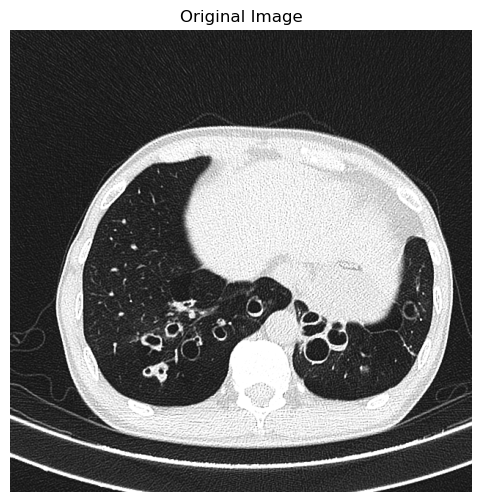

In [13]:
# Load a sample biomedical image
image = cv2.imread("lung.jpeg")  # Replace with your biomedical image
gray_image = color.rgb2gray(image)
# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


### Preprocessing 
### 1. Gaussian Blur
### 2. Resize

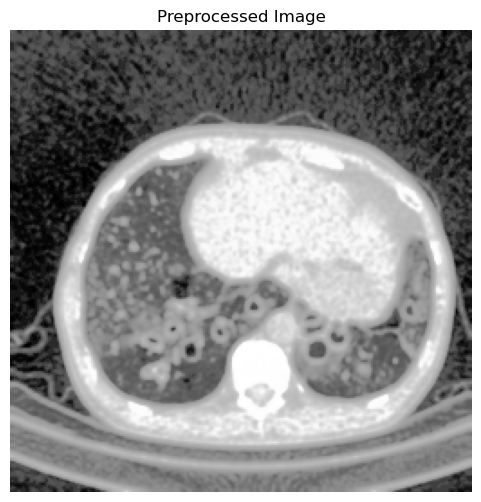

In [14]:
# Resize the image
resized_image = cv2.resize(gray_image, (256, 256))
# Denoise the image
denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
# Adjust the contrast (if necessary)
contrast_image = cv2.equalizeHist(img_as_ubyte(denoised_image))
# Display the preprocessed image
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


C:\Users\DSL-189\AppData\Local\Temp\ipykernel_15308\495025126.py:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary_image = closing(contrast_image > thresh, square(3))


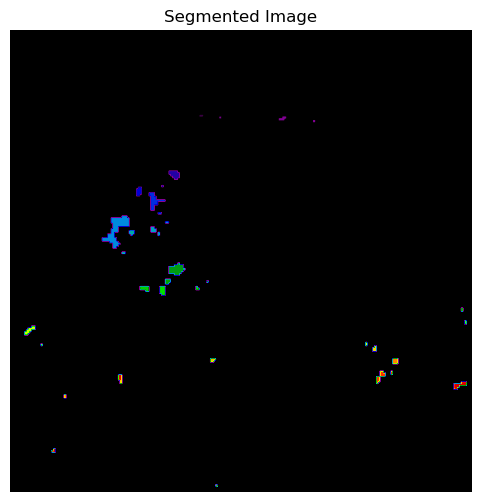

In [15]:
# Apply thresholding
thresh = threshold_otsu(contrast_image)
binary_image = closing(contrast_image > thresh, square(3))

# Remove artifacts connected to image border
cleared = clear_border(binary_image)

# Label image regions
label_image = label(cleared)

# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


Region 10: Area=102.0, Perimeter=59.59188309203678


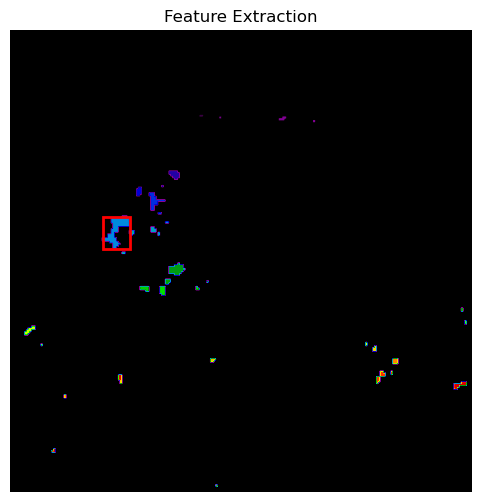

In [16]:
# Extract region properties
regions = regionprops(label_image)

# Display properties of regions
for region in regions:
    # Take regions with large enough areas
    if region.area >= 100:
        print(f'Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')

# Display the regions
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
for region in regions:
    if region.area >= 100:
        # Draw rectangle around segmented regions
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                             fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.title('Feature Extraction')
plt.axis('off')
plt.show()


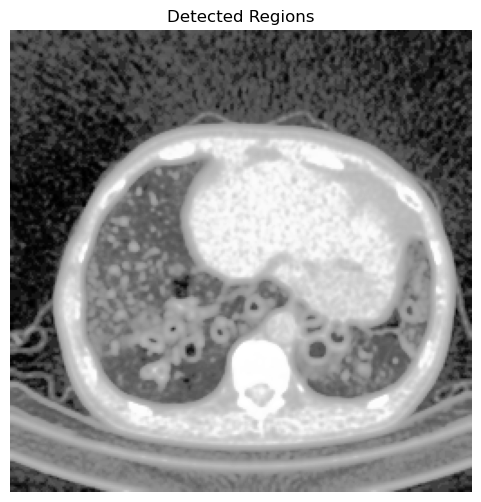

In [17]:
# Detect specific features (e.g., regions with area > 200)
for region in regions:
    if region.area > 200:
        print(f'Detected Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')
        minr, minc, maxr, maxc = region.bbox
        cv2.rectangle(contrast_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)

# Display the detected regions
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Detected Regions')
plt.axis('off')
plt.show()


## Approach 2 (Not necessary)

In [19]:
import cv2
import numpy as np
from skimage.feature import canny
from  skimage.measure import label, regionprops
import matplotlib.pyplot as plt

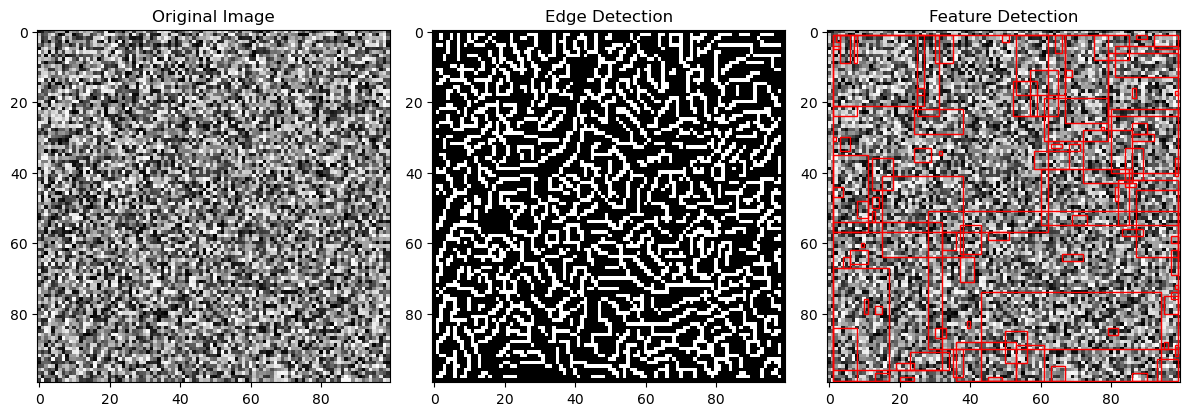

In [20]:
# Generate synthetic biomedical images (grayscale)
images = [np.random.rand(100, 100) for _ in range(100)]
# Preprocessing (Gaussian blur)
preprocessed_images = [cv2.GaussianBlur(img, (5, 5), 0) for img in images]
# Segmentation (Canny edge detection)
edges = [canny(img) for img in preprocessed_images]
# Feature extraction and detection (region properties)
features = [regionprops(label(edge)) for edge in edges]
# Display sample image, edges, and detected features
fig, ax = plt.subplots(1, 3, figsize=(12, 4))


ax[0].imshow(images[0], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(edges[0], cmap='gray')
ax[1].set_title('Edge Detection')
ax[2].imshow(images[0], cmap='gray')
for region in features[0]:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, edgecolor='red', facecolor='none')
    ax[2].add_patch(rect)
ax[2].set_title('Feature Detection')
plt.tight_layout()
plt.show()


## **Structured and Unstructured Extraction -Exp3**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DSL-189\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
#Load Structured Data
structured_data = pd.DataFrame({
    'PatientID' : [1, 2, 3, 4, 5], 
    'Age' : [34, 45, 23, 50, 40],
    'Gender' : ['M', 'F', 'F', 'M', 'M'],
    'Diagnosis' : ['Diabetes', 'Hypertension', 'Asthma', 'Diabetes', 'Hypertension']
})

print(structured_data)

   PatientID  Age Gender     Diagnosis
0          1   34      M      Diabetes
1          2   45      F  Hypertension
2          3   23      F        Asthma
3          4   50      M      Diabetes
4          5   40      M  Hypertension


In [26]:
#Load Unstructured Data
unstructured_data = [
    "Patient has a history of hypertension and diabetes. Prescrivbe medication X.",
    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and exercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed."
]

In [27]:
structured_data.head()

,PatientID,Age,Gender,Diagnosis
0,1,34,M,Diabetes
1,2,45,F,Hypertension
2,3,23,F,Asthma
3,4,50,M,Diabetes
4,5,40,M,Hypertension


In [28]:
structured_data.isnull().sum()

PatientID    0
Age          0
Gender       0
Diagnosis    0
dtype: int64

In [30]:
#Encode catergorical variables
structured_data['Gender'] = structured_data['Gender'].map({'M':0, 'F':1})
print(structured_data.head())

   PatientID  Age  Gender     Diagnosis
0          1   34       0      Diabetes
1          2   45       1  Hypertension
2          3   23       1        Asthma
3          4   50       0      Diabetes
4          5   40       0  Hypertension


In [31]:
#preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [32]:
#apply preprocessing to clinical notes
cleaned_notes = [preprocess_text(note) for note in unstructured_data]

In [34]:
#vectorizer
vectorizer = TfidfVectorizer(max_features=10)
X_tfidf = vectorizer.fit_transform(cleaned_notes).toarray()

pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out()).head()

,asthmadiagnosisconfirmedpatientadvisedtouseinhalerdaily,diabetespatientrecommendeddietandexercise,hypertensionpatientneedsregularmonitoringofbloodpressure,patientdiagnosedwithhypertensionmedicationyprescribed,patienthasahistoryofhypertensionanddiabetesprescrivbemedicationx
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [36]:
#Apply PCA to structured_data
pca = PCA(n_components=2)
data_encoded = pd.get_dummies(structured_data.drop('PatientID', axis=1))

# Now apply PCA
pca = PCA(n_components=2)
structured_data_pca = pca.fit_transform(data_encoded)

# Convert PCA results to DataFrame for easier analysis
pca_results = pd.DataFrame(structured_data_pca, columns=['PC1', 'PC2'])
print(pca_results.head())

         PC1       PC2
0   4.377479 -0.887456
1  -6.592079  0.963523
2  15.436884  0.190821
3 -11.604338 -0.686830
4  -1.617946  0.419942


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)  # Normalize data
structured_data_pca = pca.fit_transform(data_scaled)  # Apply PCA